script to compare the hindcasts (May) at seasonal scale (6months) with the "home reanalysis" (dcppA-assim) and satelital obervations for variables averaged in a given region (raw timeserie, anomalies, climatology and correlation).  Might need some adaptation for november startdate.

### Input parameters and libraries

In [20]:
#import matplotlib
#matplotlib.use('Agg') # to run on aneto (not very useful for this script)
from function_read import * # some auxiliary functions that I wrote to read the file
from forecast_veri import * # some auxiliary functions for forecast verification
#other libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import scipy.stats
import cartopy as cart
import cartopy.crs as ccrs
from function_read import *
from mpl_toolkits.axisartist.axislines import Subplot 
import sys

# name of the experience
exp="dcppA-hindcast"

#period to analyse
year1=1998
year2=2013
#number of months of the hindcast to read
nmon=6
#number of members
nmemb=10
#starting month of the hindcast (may:5 or November:11)
monstart=5

#variable to analyse (should work for all surface variables, extra check might be needed for 3D variables)
varname="chlos"
level="all"

#region definition
#regname="global"
#lat_bnds = [-90,90]
#lon_bnds = [-180,179]

#regname="Atl3"
#lat_bnds = [-3,3]
#lon_bnds = [-20,-1]

#regname="TropPac"
#lat_bnds = [-30,30]
#lon_bnds = [360-200,360-120]

#regname="NorthAtl"
#lat_bnds = [40,70]
#lon_bnds = [360-70,-1]

regname="TropAtl"
lat_bnds = [-30,30]
lon_bnds = [360-70,20]

scaledict = {"tos":1, "bigthetao":1,"chlos":1e3, "o2":1e3, "no3os":1e3, "intpp":12*1000*3600*24 }
scale=scaledict.get(varname)

In [21]:
#compute dates from year1 and year2
nyear=year2-year1+1
yearlst=np.arange(year1, year2+1)
sdatelst=[]
for year in yearlst:
    sdatelst.append(date(year=year, month=monstart, day=1))

### Read files: hindcasts

In [22]:
# list to be converted in array to store the data
varMM=[]
# list to store the missing members
# additional comment: in the test simulation I was investigating a few members where missing; I replace them
# by the members 5 this should be remove when the dataset will be complete
missing=[]
#loop over members
for imemb in range(1,nmemb+1):
    moddate=[]
    for s in sdatelst:
        #f=glob("/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-hindcast/*r%ii2p1f2/"%imemb+varname+"*gn_"+s.strftime("%Y%m")+"*04.nc")
        f=glob("/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-hindcast/*r%ii2p1f2/"%imemb+varname+"_Omon**"+s.strftime("%Y%m")+"*")
        # as said before if the member is missing use the member 5 (to be removed with a complete dataset)
        if len(f)==0:
            f=glob("/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-hindcast/*r%ii2p1f2/"%(5)+varname+"_Omon*"+s.strftime("%Y%m")+"*")
            missing.append((s,imemb))
        f=f[0] 
        #extract level in cas of 3D files
        if level!="all":
            f=cdo.selvar(varname, input=f)
            f=cdo.sellevidx(level, input=f)
            f=cdo.vertmean(input=f)
        #    print(f)
        #interpolation to 1x1 degree grid 
        f=cdo.remapbil("r360x180", input=f)
        varf=netCDF4.Dataset(f)
        #extract array from fonction read (the fonction would need adaptation to work directly on the NEMO grid)
        mod, latobs, lonobs  = extract_array(varf, varname, nmon, lon_bnds, lat_bnds, level="all")
        #mask land
        mod=np.ma.array(mod, mask=mod>1e10)
        #average over the region (from function read)
        mod = area_av(mod, 1, 2, latobs, lonobs)
        moddate.append(mod)
        
    varMM.append(np.ma.array(moddate))
    
varMM=np.ma.array(varMM)*scale

all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [290  20]
3
(6, 60, 91)
all
True [290  20]
3
(6, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


In [23]:
#check missing members
missing

[(datetime.date(1998, 5, 1), 1),
 (datetime.date(2000, 5, 1), 1),
 (datetime.date(1999, 5, 1), 3),
 (datetime.date(2003, 5, 1), 4),
 (datetime.date(2004, 5, 1), 4),
 (datetime.date(2012, 5, 1), 4),
 (datetime.date(2013, 5, 1), 4)]

### read the files:observation

In [24]:
pathobs = "/cnrm/pastel/USERS/prodhommec/NO_SAVE/obs/"
if varname=="chlos":
    obsname="ESA-CCI"
    fileobs = pathobs+"chlos_Omon_ESACCI-OC-L3S_fv5.0_199709-202006_1d.nc"
    fileobs=cdo.remapbil("r360x180", input=fileobs)
    varfobs=netCDF4.Dataset(fileobs)
    varfobs.variables
    #extract array from fonction read and read the timesteps until the end of the period (year1->year2
    obs, latobs, lonobs  = extract_array(varfobs, varname, (yearlst[-1]-1998+2)*12+4, lon_bnds, lat_bnds, level="all")
    obs=np.ma.array(obs, mask=obs>1e10)
    #remove the timesteps from 09-1997 to 01-1998
    obs = area_av(obs[((yearlst[0]-1998)*12+4):,:,:], 1, 2, latobs, lonobs)
    #obs = np.ma.mean(np.ma.mean(obs[((yearlst[0]-1998)*12+4):,:,:], axis=2), axis=1)
elif varname=="intpp":
    obsname="Kulk et al. 2020"
    fileobs = pathobs+"intpp_Omon_ESACCI-OC-PP_v4-2_Kulk_et_al_199801-201812_1d.nc"
    fileobs=cdo.remapbil("r360x180", input=fileobs)
    varfobs=netCDF4.Dataset(fileobs)
    varfobs.variables
    #remove the timesteps from 09-1997 to 01-1998
    obs, latobs, lonobs  = extract_array(varfobs, varname, (yearlst[-1]-1998+2)*12, lon_bnds, lat_bnds, level="all")
    obs=np.ma.array(obs, mask=obs>1e10)
    obs = area_av(obs[((yearlst[0]-1998)*12):,:,:], 1, 2, latobs, lonobs)
elif varname=="tos":
    obsname="ersst"
    fileobs = pathobs+"ersst-v4_185401-201612.nc"
    fileobs=cdo.remapbil("r360x180", input=fileobs)
    varfobs=netCDF4.Dataset(fileobs)
    varfobs.variables
    #remove the timesteps from 09-1997 to 01-1998
    obs, latobs, lonobs  = extract_array(varfobs, "sst", (yearlst[-1]-1854+2)*12, lon_bnds, lat_bnds, level="all")
    obs=np.ma.array(obs, mask=obs<-300)
    obs = area_av(obs[((yearlst[0]-1854)*12):,0,:,:], 1, 2, latobs, lonobs)


all
True [290  20]
3


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(208, 60, 91)


### read the files: Forced simulation (NEMO-PISCES forced by JRA55)

the file is not used in the current version of the code, but calculations are done (correlations, anomalies.... so it's easy to use this simulation as a refernce instead of observation or dcppA-assim)

In [25]:
f="/cnrm/pastel/USERS/prodhommec/NO_SAVE/JRA55doV1.5_Acycl/"+varname+"_Omon_CNRM-ESM2-1_gcpA_r1i1p1f1_gn_184801-201912.nc"
if level!="all":
    f=cdo.remapbil("r360x180", input=("-sellevel,%i "%level)+f)
else:
    f=cdo.remapbil("r360x180", input=f)
#print(f)
varffor=netCDF4.Dataset(f)
#extract array from fonction read 
indexfor, latfor, lonfor  = extract_array(varffor, varname, (year2-1848+2)*12, lon_bnds, lat_bnds)
indexfor=np.ma.array(indexfor, mask=indexfor>1e10)
indexfor = area_av(indexfor[((year1-1848)*12):,:,:], 1, 2, latfor, lonfor)*scale
#probleme interpolation


all
True [290  20]
3


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(2004, 60, 91)


### read the files: home reanalysis (dcppA-assim)

In [26]:
f="/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-assim_r4i1p1f2/"+varname+"_Omon_CNRM-ESM2-1_dcppA-assim_r4i1p1f2_gn_196001-201412.nc"
if level!="all":
    f=cdo.remapbil("r360x180", input=("-sellevel,%i "%level)+f)
else:
    f=cdo.remapbil("r360x180", input=f)
print(f)

varfndg=netCDF4.Dataset(f)
#extract array from fonction read 
indexndg, latndg, lonndg  = extract_array(varfndg, varname, (year2-1960+2)*12, lon_bnds, lat_bnds, level="all")
indexndg=np.ma.array(indexndg, mask=indexndg>1e10)
indexndg = area_av(indexndg[((year1-1960)*12):,:,:], 1, 2, latndg, lonndg)*scale

/home/prodhommec/tmp/cdoPyxr6344cb
all
True [290  20]
3
(660, 60, 91)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


In [27]:
### Analysis

In [28]:
# transform reference to have data organized following (nyear, 12, nlon, nlat)
indexobsresh = obs.reshape((year2-year1+2),12)
indexforresh = indexfor.reshape((year2-year1+2),12)
indexndgresh = indexndg.reshape((year2-year1+2),12)


#compute climatologies
climmod=np.mean(varMM, axis=(0,1))
climobs = np.mean(indexobsresh, axis = 0)
climfor = np.mean(indexforresh, axis = 0)
climndg = np.mean(indexndgresh, axis = 0)

#compute anomalies 
#additional note: This should be done in cross-validation for this preliminary analysis it's not done)
anom = varMM-extend_table(climmod, [1, (year2-year1+1)])
anomobs = np.ndarray.flatten(indexobsresh - climobs)
anomfor = np.ndarray.flatten(indexforresh -climfor)
anomndg = np.ndarray.flatten(indexndgresh -climndg)


In [29]:
#compute correlation with observations
obsreorghind=obs[(monstart-1):((monstart-1)+(nyear)*12)].reshape(nyear, 12)
corr=[]
for imon in range(nmon):
    corr.append(scipy.stats.pearsonr(np.mean(anom, axis=0)[:,imon], obsreorghind[:,imon]))
corr=np.array(corr)

In [30]:
#compute correlation with the forced simulation (not plotted)
forreorghind=indexfor[(monstart-1):((monstart-1)+(nyear)*12)].reshape(nyear, 12)
corrfor=[]
for imon in range(nmon):
    corrfor.append(scipy.stats.pearsonr(np.mean(anom, axis=0)[:,imon], forreorghind[:,imon]))
corrfor=np.array(corrfor)

In [31]:
#compute correlation with dcppa-assm
ndgreorghind=indexndg[(monstart-1):((monstart-1)+(nyear)*12)].reshape(nyear, 12)
corrndg=[]
for imon in range(nmon):
    corrndg.append(scipy.stats.pearsonr(np.mean(anom, axis=0)[:,imon], ndgreorghind[:,imon]))
corrndg=np.array(corrndg)

### Plots

/usr/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


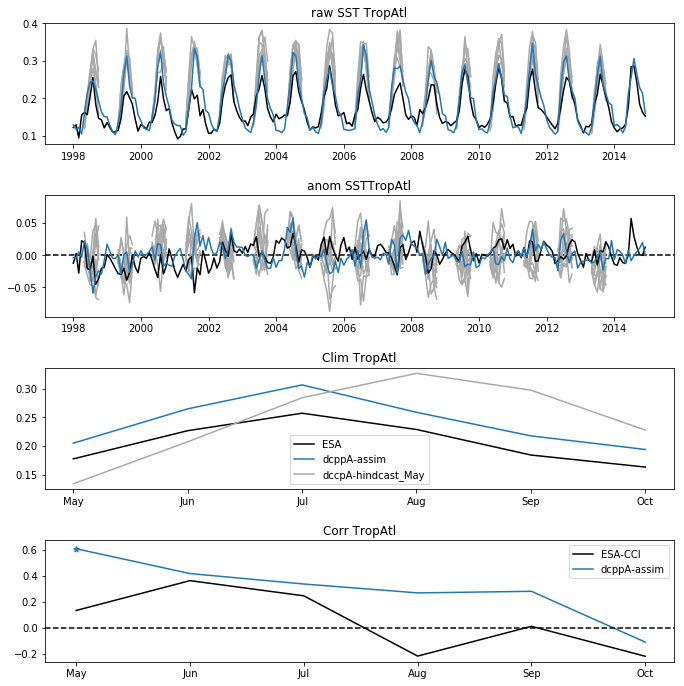

In [32]:
nline=4
ncol=1

fig, ax = plt.subplots(ncols=ncol, nrows=nline, 
                        figsize=(10, 10))

plt.tight_layout(pad=3)

obssdatelst=[]
for year in np.arange(year1,year2+2):
    for mon in range(1, 13):
        obssdatelst.append(date(year=year, month=mon, day=1))


for isdates in range(len(sdatelst)):
    modsdatelst=[]
    for imon in range(nmon):
        modsdatelst.append(sdatelst[isdates]+relativedelta(months=+imon))
    
        
for isdates in range(len(sdatelst)):
    modsdatelst=[]
    for imon in range(nmon):
        modsdatelst.append(sdatelst[isdates]+relativedelta(months=+imon))

    for imemb in range(6):
        ax[0].plot(modsdatelst, np.ndarray.flatten(varMM[imemb,isdates,:]), color="darkgrey")
        
ax[0].plot(obssdatelst, obs, color="black")
#ax[0].plot(obssdatelst[:(year2-year1+2)*12], indexfor, color="blue")
ax[0].plot(obssdatelst[:(year2-year1+2)*12], indexndg, color="C0")


        

ax[0].set_title("raw SST "+regname)
    
ax[1].axhline(y=0, linestyle="dashed", color="black")

for isdates in range(len(sdatelst)):
    modsdatelst=[]
    for imon in range(nmon):
        modsdatelst.append(sdatelst[isdates]+relativedelta(months=+imon))
    
    for imemb in range(nmemb):
        ax[1].plot(modsdatelst, np.ndarray.flatten(anom[imemb,isdates,:]), color="darkgrey")
        
ax[1].plot(obssdatelst, anomobs, color="black")
#ax[1].plot(obssdatelst[:(year2-year1+2)*12], anomfor, color="blue")
ax[1].plot(obssdatelst[:(year2-year1+2)*12], anomndg, color="C0")

ax[1].set_title("anom SST"+regname)


        

ax[2].plot([s.strftime("%b") for s in modsdatelst], climobs[monstart:(monstart+nmon)], color="black")
#ax[2].plot([s.strftime("%b") for s in modsdatelst], climfor[monstart:(monstart+nmon)], color="blue")
ax[2].plot([s.strftime("%b") for s in modsdatelst], climndg[monstart:(monstart+nmon)], color="C0")
ax[2].plot([s.strftime("%b") for s in modsdatelst], climmod, color="darkgrey")

ax[2].set_title("Clim "+regname)

ax[2].legend(["ESA", "dcppA-assim", "dccpA-hindcast_May"])
        
        

line1 = ax[3].plot([s.strftime("%b") for s in modsdatelst], corr[:,0], color="black")
for imon in range(nmon):
    if corr[imon,1]<0.1:
        ax[3].scatter(modsdatelst[imon].strftime("%b"), corr[imon,0], marker="*", color="black")
            
line2 = ax[3].plot([s.strftime("%b") for s in modsdatelst], corrndg[:,0], color="C0")
for imon in range(nmon):
    if corrndg[imon,1]<0.1:
        ax[3].scatter(modsdatelst[imon].strftime("%b"), corrndg[imon,0], marker="*", color="C0")
ax[3].axhline(y=0, linestyle="dashed", color="black")

ax[3].set_title("Corr "+regname)

ax[3].legend([ obsname,  "dcppA-assim"])



In [33]:
figdir="/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/plot/Skill/"
figname=figdir+("Corr"+"_"+exp+"_"+varname+"_monstart-%i_"%monstart+regname)
figname=(figname+".pdf")

print(figname)
fig.savefig(figname)

/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/plot/Skill/Corr_dcppA-hindcast_chlos_monstart-5_TropAtl.pdf
